In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv('openpowerlifting.csv')
print(f'Dataset size is: {len(df)} Rows, {len(df.columns)} Columns')
print(f'Columns are:{df.columns}')


/tmp/ipykernel_12499/1375123445.py:1: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('openpowerlifting.csv')


Dataset size is: 1423354 Rows, 37 Columns
Columns are:Index(['Name', 'Sex', 'Event', 'Equipment', 'Age', 'AgeClass', 'Division',
       'BodyweightKg', 'WeightClassKg', 'Squat1Kg', 'Squat2Kg', 'Squat3Kg',
       'Squat4Kg', 'Best3SquatKg', 'Bench1Kg', 'Bench2Kg', 'Bench3Kg',
       'Bench4Kg', 'Best3BenchKg', 'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg',
       'Deadlift4Kg', 'Best3DeadliftKg', 'TotalKg', 'Place', 'Wilks',
       'McCulloch', 'Glossbrenner', 'IPFPoints', 'Tested', 'Country',
       'Federation', 'Date', 'MeetCountry', 'MeetState', 'MeetName'],
      dtype='object')


In [23]:
upd_columns = ['Sex', 'Equipment', 'Age', 'Division', 'BodyweightKg', 'Squat1Kg', 'Squat2Kg', 'Squat3Kg',
                       'Best3SquatKg', 'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Best3BenchKg', 'Deadlift1Kg',
                       'Deadlift2Kg', 'Deadlift3Kg', 'Best3DeadliftKg', 'TotalKg', 'Place', 'Country',
                       'Federation', 'MeetCountry']
df = df[upd_columns]
df

,Sex,Equipment,Age,Division,BodyweightKg,Squat1Kg,Squat2Kg,Squat3Kg,Best3SquatKg,Bench1Kg,...,Best3BenchKg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Best3DeadliftKg,TotalKg,Place,Country,Federation,MeetCountry
0,F,Wraps,29.0,F-OR,59.8,80.0,92.5,105.0,105.0,45.0,...,55.0,110.0,120.0,130.0,130.0,290.0,4,NaN,GPC-AUS,Australia
1,F,Wraps,29.0,F-OR,58.5,100.0,110.0,120.0,120.0,55.0,...,67.5,130.0,140.0,145.0,145.0,332.5,2,NaN,GPC-AUS,Australia
2,F,Raw,40.0,F-OR,55.4,NaN,NaN,NaN,NaN,27.5,...,32.5,NaN,NaN,NaN,NaN,32.5,1,NaN,GPC-AUS,Australia
3,F,Wraps,23.0,F-OR,60.0,-105.0,-105.0,105.0,105.0,67.5,...,72.5,132.5,-140.0,-140.0,132.5,310.0,3,NaN,GPC-AUS,Australia
4,F,Wraps,45.0,F-OR,104.0,120.0,130.0,140.0,140.0,70.0,...,80.0,150.0,160.0,170.0,170.0,390.0,3,NaN,GPC-AUS,Australia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423349,M,Raw,60.5,Masters 2,73.5,160.0,170.0,175.0,175.0,80.0,...,87.5,180.0,190.0,-195.0,190.0,452.5,4,NaN,PZKFiTS,Poland
1423350,M,Raw,55.5,Masters 2,63.5,90.0,100.0,110.0,110.0,90.0,...,95.0,140.0,160.0,170.0,170.0,375.0,5,Poland,PZKFiTS,Poland
1423351,M,Raw,62.5,Masters 2,94.4,140.0,150.0,160.0,160.0,100.0,...,100.0,160.0,170.0,180.0,180.0,440.0,6,NaN,PZKFiTS,Poland
1423352,M,Raw,63.5,Masters 2,80.8,-165.0,-165.0,-165.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,DQ,NaN,PZKFiTS,Poland


In [24]:
df = df.dropna()
df = df[(df['Squat1Kg']>0) & (df['Squat2Kg']>0) & (df['Squat3Kg']>0) & (df['Bench1Kg']>0) & (df['Bench2Kg']>0) & (df['Bench3Kg']>0) & (df['Deadlift1Kg']>0) & (df['Deadlift2Kg']>0) & (df['Deadlift3Kg']>0)]
df

,Sex,Equipment,Age,Division,BodyweightKg,Squat1Kg,Squat2Kg,Squat3Kg,Best3SquatKg,Bench1Kg,...,Best3BenchKg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Best3DeadliftKg,TotalKg,Place,Country,Federation,MeetCountry
55,M,Wraps,24.0,M-OR,98.80,260.0,275.0,282.5,282.5,155.0,...,170.0,250.0,267.5,277.5,277.5,730.0,3,Australia,GPC-AUS,Australia
56,M,Wraps,26.0,M-OR,82.50,250.0,265.0,272.5,272.5,150.0,...,160.0,240.0,257.5,267.5,267.5,700.0,1,Australia,GPC-AUS,Australia
71,M,Wraps,41.0,M-OR,88.50,250.0,262.5,272.5,272.5,155.0,...,162.5,250.0,265.0,280.0,280.0,715.0,1,Australia,GPC-AUS,Australia
90,M,Wraps,33.0,M-OR,107.40,190.0,200.0,212.5,212.5,120.0,...,135.0,240.0,252.5,265.0,265.0,612.5,3,Australia,GPC-AUS,Australia
107,M,Wraps,26.0,M-OR,137.40,320.0,355.0,370.0,370.0,180.0,...,200.0,290.0,310.0,330.0,330.0,900.0,1,Australia,GPC-AUS,Australia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423198,F,Wraps,24.5,O,74.95,130.0,140.0,146.0,146.0,50.0,...,60.0,150.0,160.0,172.5,172.5,378.5,2,Serbia,USPS,Serbia
1423204,F,Wraps,17.5,T2,117.50,120.0,125.0,130.0,130.0,77.5,...,82.5,120.0,125.0,130.0,130.0,342.5,8,Serbia,USPS,Serbia
1423224,F,Raw,16.5,Open,47.60,90.0,100.0,102.5,102.5,37.5,...,42.5,110.0,120.0,125.5,125.5,270.5,2,Poland,PZKFiTS,Poland
1423228,F,Raw,36.5,Open,56.61,125.0,130.0,135.0,135.0,72.5,...,77.5,140.0,147.5,153.0,153.0,365.5,1,Poland,PZKFiTS,Poland


In [25]:
columns_to_encode = ['Sex', 'Equipment', 'Division', 'Country', 'Federation', 'MeetCountry', 'Place']

label_encoder = LabelEncoder()
for col in columns_to_encode:
    df[col] = label_encoder.fit_transform(df[col])
df

,Sex,Equipment,Age,Division,BodyweightKg,Squat1Kg,Squat2Kg,Squat3Kg,Best3SquatKg,Bench1Kg,...,Best3BenchKg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Best3DeadliftKg,TotalKg,Place,Country,Federation,MeetCountry
55,1,3,24.0,355,98.80,260.0,275.0,282.5,282.5,155.0,...,170.0,250.0,267.5,277.5,277.5,730.0,17,4,50,3
56,1,3,26.0,355,82.50,250.0,265.0,272.5,272.5,150.0,...,160.0,240.0,257.5,267.5,267.5,700.0,0,4,50,3
71,1,3,41.0,355,88.50,250.0,262.5,272.5,272.5,155.0,...,162.5,250.0,265.0,280.0,280.0,715.0,0,4,50,3
90,1,3,33.0,355,107.40,190.0,200.0,212.5,212.5,120.0,...,135.0,240.0,252.5,265.0,265.0,612.5,17,4,50,3
107,1,3,26.0,355,137.40,320.0,355.0,370.0,370.0,180.0,...,200.0,290.0,310.0,330.0,330.0,900.0,0,4,50,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423198,0,3,24.5,638,74.95,130.0,140.0,146.0,146.0,50.0,...,60.0,150.0,160.0,172.5,172.5,378.5,11,78,116,60
1423204,0,3,17.5,706,117.50,120.0,125.0,130.0,130.0,77.5,...,82.5,120.0,125.0,130.0,130.0,342.5,31,78,116,60
1423224,0,1,16.5,647,47.60,90.0,100.0,102.5,102.5,37.5,...,42.5,110.0,120.0,125.5,125.5,270.5,11,71,93,55
1423228,0,1,36.5,647,56.61,125.0,130.0,135.0,135.0,72.5,...,77.5,140.0,147.5,153.0,153.0,365.5,0,71,93,55


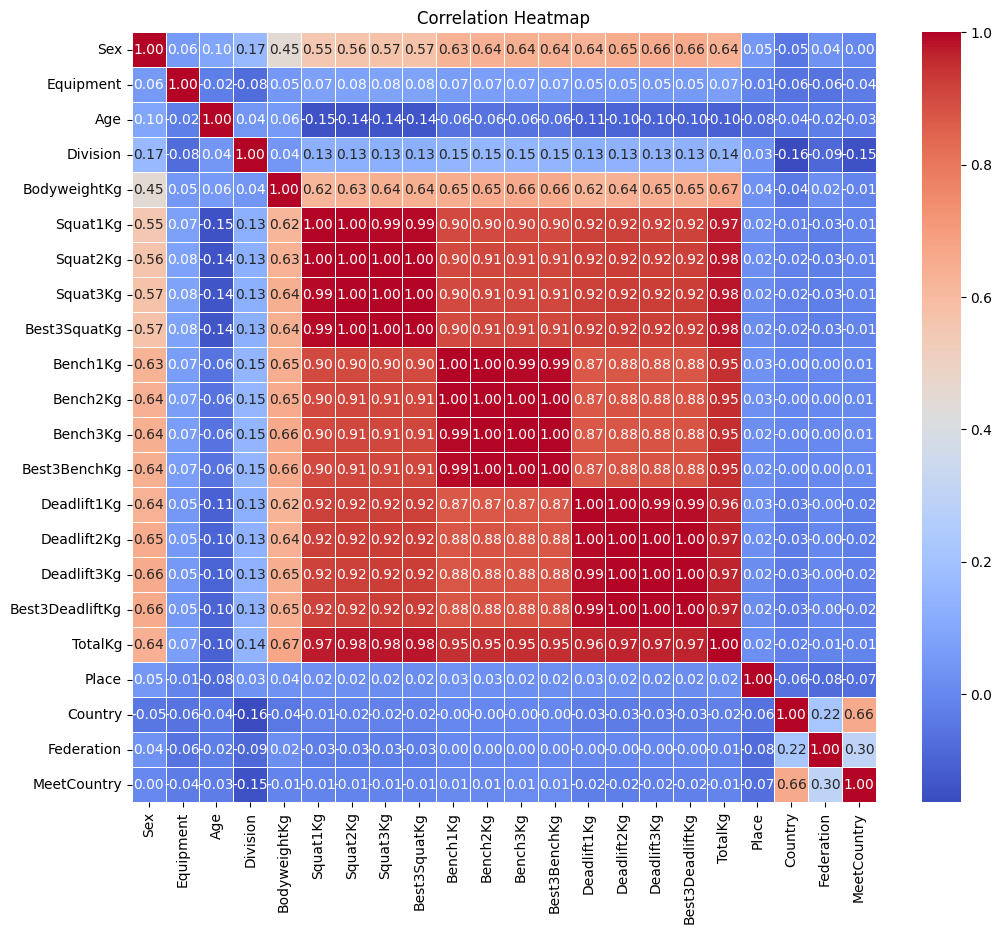

In [26]:
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

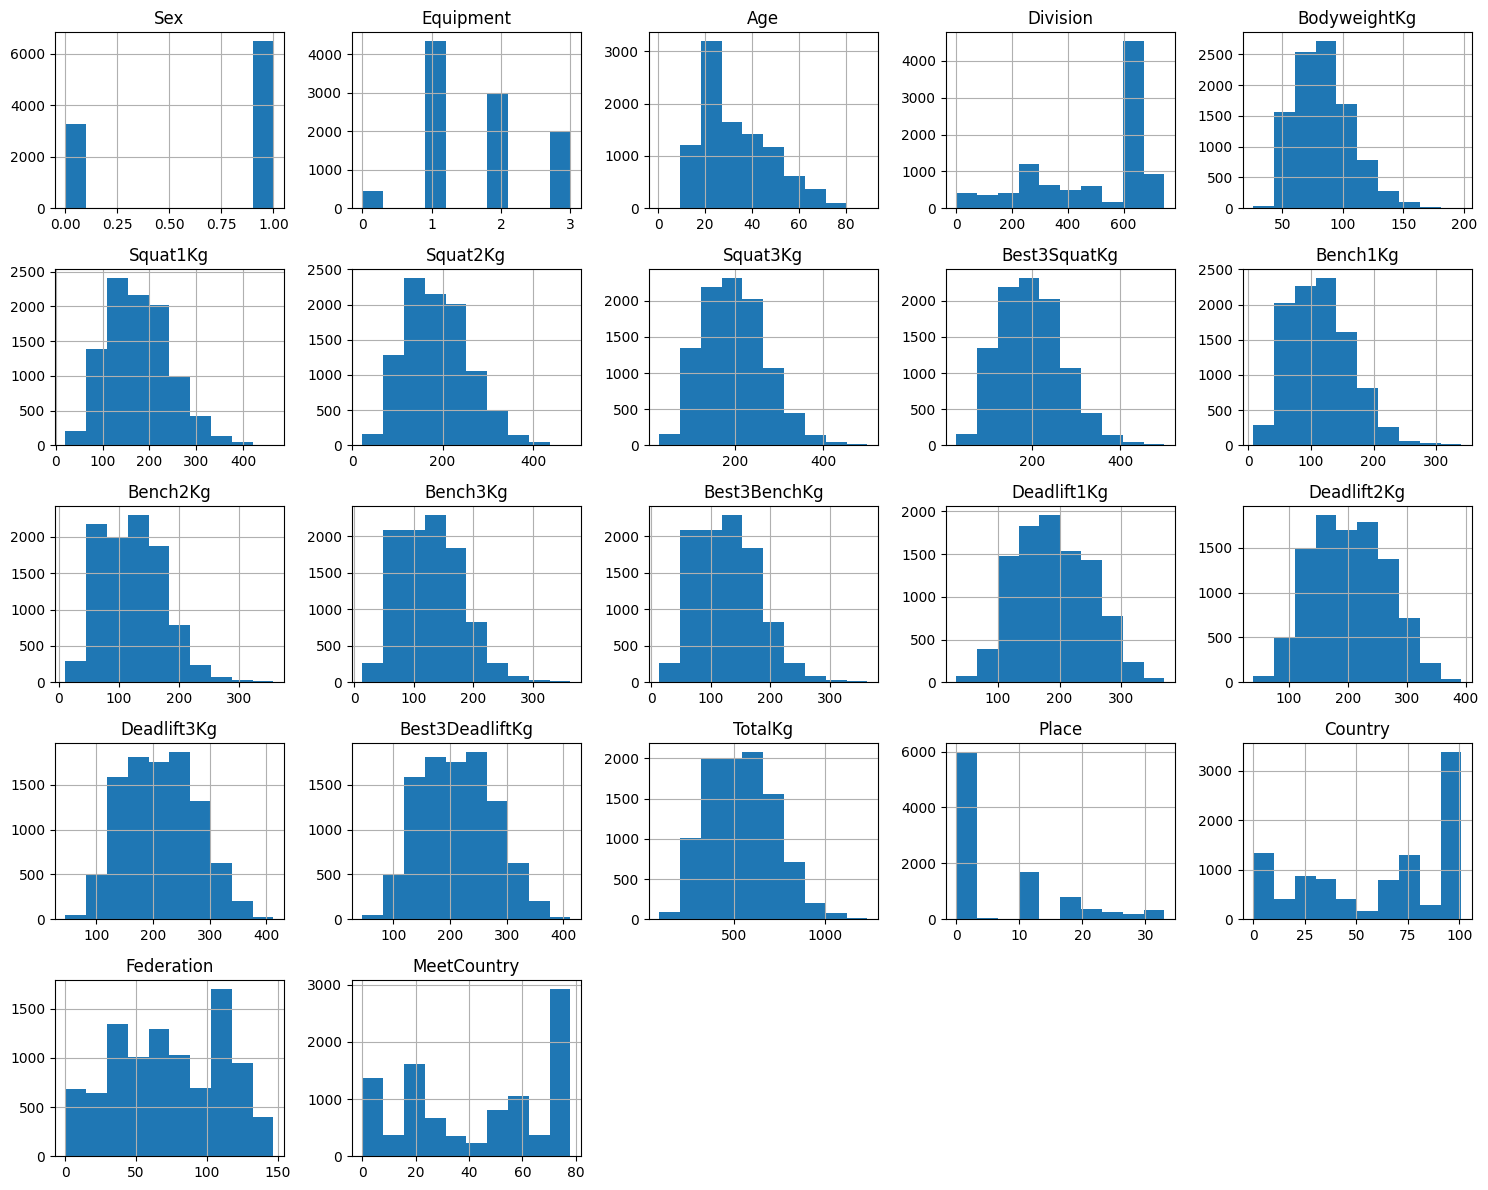

In [27]:
df.hist(figsize=(15, 12))
plt.tight_layout()
plt.show()

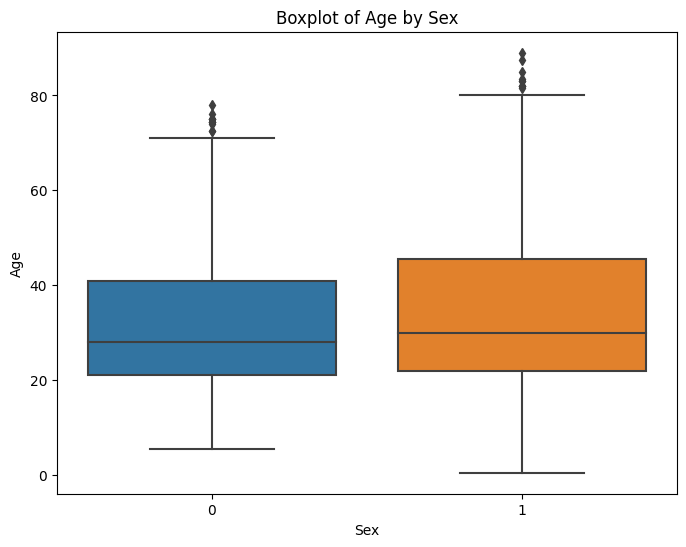

In [28]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sex', y='Age', data=df)
plt.title('Boxplot of Age by Sex')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.show()

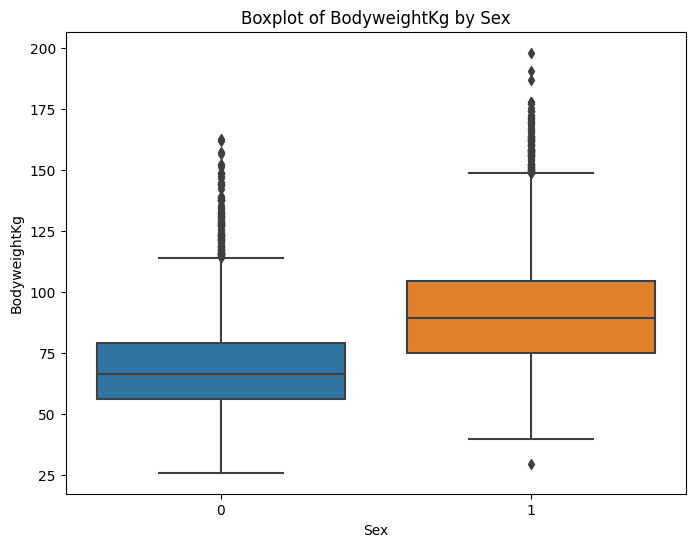

In [29]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sex', y='BodyweightKg', data=df)
plt.title('Boxplot of BodyweightKg by Sex')
plt.xlabel('Sex')
plt.ylabel('BodyweightKg')
plt.show()

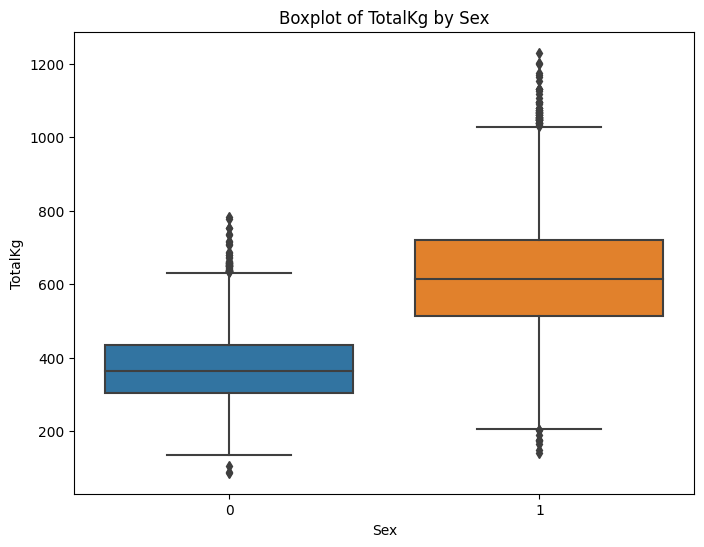

In [30]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sex', y='TotalKg', data=df)
plt.title('Boxplot of TotalKg by Sex')
plt.xlabel('Sex')
plt.ylabel('TotalKg')
plt.show()

In [33]:
columns_to_normalize = ['Age', 'BodyweightKg', 'Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Best3SquatKg',
                        'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Best3BenchKg', 'Deadlift1Kg',
                        'Deadlift2Kg', 'Deadlift3Kg', 'Best3DeadliftKg', 'TotalKg']
scaler = MinMaxScaler()
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
df

,Sex,Equipment,Age,Division,BodyweightKg,Squat1Kg,Squat2Kg,Squat3Kg,Best3SquatKg,Bench1Kg,...,Best3BenchKg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Best3DeadliftKg,TotalKg,Place,Country,Federation,MeetCountry
55,1,3,0.265537,355,0.423280,0.539326,0.548913,0.539683,0.539683,0.442771,...,0.448424,0.644444,0.645390,0.632653,0.632653,0.562363,17,4,50,3
56,1,3,0.288136,355,0.328507,0.516854,0.527174,0.518519,0.518519,0.427711,...,0.419771,0.614815,0.617021,0.605442,0.605442,0.536105,0,4,50,3
71,1,3,0.457627,355,0.363393,0.516854,0.521739,0.518519,0.518519,0.442771,...,0.426934,0.644444,0.638298,0.639456,0.639456,0.549234,0,4,50,3
90,1,3,0.367232,355,0.473283,0.382022,0.385870,0.391534,0.391534,0.337349,...,0.348138,0.614815,0.602837,0.598639,0.598639,0.459519,17,4,50,3
107,1,3,0.288136,355,0.647712,0.674157,0.722826,0.724868,0.724868,0.518072,...,0.534384,0.762963,0.765957,0.775510,0.775510,0.711160,0,4,50,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423198,0,3,0.271186,638,0.284610,0.247191,0.255435,0.250794,0.250794,0.126506,...,0.133238,0.348148,0.340426,0.346939,0.346939,0.254705,11,78,116,60
1423204,0,3,0.192090,706,0.532008,0.224719,0.222826,0.216931,0.216931,0.209337,...,0.197708,0.259259,0.241135,0.231293,0.231293,0.223195,31,78,116,60
1423224,0,1,0.180791,647,0.125589,0.157303,0.168478,0.158730,0.158730,0.088855,...,0.083095,0.229630,0.226950,0.219048,0.219048,0.160175,11,71,93,55
1423228,0,1,0.406780,647,0.177975,0.235955,0.233696,0.227513,0.227513,0.194277,...,0.183381,0.318519,0.304965,0.293878,0.293878,0.243326,0,71,93,55


In [49]:
features = ['Age', 'BodyweightKg', 'Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Best3SquatKg',
            'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Best3BenchKg', 'Deadlift1Kg',
            'Deadlift2Kg', 'Deadlift3Kg', 'Best3DeadliftKg', 'TotalKg']

# Features (X) and target (y) variables
X = df[features]
y = df['Sex']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the kNN classifier
for n in [2, 5, 10, 15, 50, 100, 500, 2000, 3000]:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    
    # Predict 'Sex' for the testing set
    y_pred = knn.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy:{accuracy}, for {n} nearest neighbours')

Accuracy:0.8826844262295082, for 2 nearest neighbours
Accuracy:0.9016393442622951, for 5 nearest neighbours
Accuracy:0.9021516393442623, for 10 nearest neighbours
Accuracy:0.9057377049180327, for 15 nearest neighbours
Accuracy:0.9011270491803278, for 50 nearest neighbours
Accuracy:0.8970286885245902, for 100 nearest neighbours
Accuracy:0.8775614754098361, for 500 nearest neighbours
Accuracy:0.8539959016393442, for 2000 nearest neighbours
Accuracy:0.84375, for 3000 nearest neighbours


In [42]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Predict 'Sex' for the testing set
y_pred = decision_tree.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8847336065573771


In [51]:
param_grid = {
    'C': [0.1, 1, 10, 100],  # Possible values for C
    'gamma': [0.01, 0.1, 1, 10],  # Possible values for gamma
    'kernel': ['linear', 'rbf']  # Possible values for kernel
}

# Initialize the SVM classifier
svm_classifier = SVC(random_state=42)

# Initialize GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(svm_classifier, param_grid, cv=3, scoring='accuracy')

# Fit the model to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:")
print(grid_search.best_params_)

# Predict 'Sex' for the testing set using the best model
best_svm_classifier = grid_search.best_estimator_
y_pred = best_svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Best Hyperparameters:
{'C': 100, 'gamma': 1, 'kernel': 'rbf'}
Accuracy: 0.9175204918032787


In [46]:
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

# Predict 'Sex' for the testing set
y_pred = random_forest.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9190573770491803


In [48]:
adaboost_classifier = AdaBoostClassifier(random_state=42)
adaboost_classifier.fit(X_train, y_train)

# Predict 'Sex' for the testing set
y_pred = adaboost_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9042008196721312


In [53]:
svm_classifier = SVC(C=100, gamma=1, kernel='rbf', random_state=42)
svm_classifier.fit(X_train, y_train)

# Predict 'Sex' for the testing set
y_pred = svm_classifier.predict(X_test)

# Calculate and print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.87       650
           1       0.93      0.95      0.94      1302

    accuracy                           0.92      1952
   macro avg       0.91      0.90      0.91      1952
weighted avg       0.92      0.92      0.92      1952

Confusion Matrix:
[[ 557   93]
 [  68 1234]]
